In [1]:
import pandas as pd
import sys
mylib = '/home/fra/Project/pyProj/mlib'

In [2]:
sys.path.append(mylib)

In [3]:
data_folder = "../data/"
train_filename = 'abalone.csv'

In [4]:
df = pd.read_csv(data_folder + train_filename, skipinitialspace=True)
df.head()

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
mapping = {'M':0, 'F':1, 'I':2}

In [6]:
import utility as util
import explore as ex
import pipeline as pl
import transform as trf
from imp import reload

In [9]:
target_col = 'SEX'
exclusions=[]

In [8]:
reload(pl)

<module 'pipeline' from '/home/fra/Project/pyProj/mlib/pipeline.py'>

In [13]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder

In [25]:
ntransformer = StandardScaler
ctransformer = OrdinalEncoder
(X, y, features, py, px) = pl.standard_feature_preprocess(df, target_col, ntransformer, ctransformer, exclusions, mapping)

In [26]:
X.shape, y.shape, features.shape, df.shape

((4177, 8), (4177,), (8,), (4177, 9))

In [27]:
pd.Series(y).value_counts()

0    1528
2    1342
1    1307
dtype: int64

In [28]:
ex.count_levels(df, 'sex')

{'sex': [('F', 1307), ('I', 1342), ('M', 1528)]}

### OUt of sample: standard

In [29]:
from sklearn.model_selection import train_test_split
(traindf, testdf) = train_test_split(df, test_size=0.3)

In [30]:
(dX, dy, dfeatures, dpy, dpx) = pl.standard_feature_preprocess(traindf, target_col, ntransformer, ctransformer, exclusions, mapping)

In [31]:
import xgboost as xgb
model = xgb.XGBClassifier().fit(dX, dy)

In [32]:
ytest = dpy.transform(testdf)
Xtest = dpx.transform(testdf)

In [33]:
probas = model.predict_proba(Xtest)

In [38]:
from sklearn.metrics import roc_curve, auc

In [37]:
male_idx = 0
fpr, tpr, thresholds = roc_curve(ytest, probas[:, male_idx], pos_label=male_idx)

In [39]:
auc(fpr, tpr)

0.6504884932696484

In [40]:
female_idx = 1
fpr, tpr, thresholds = roc_curve(ytest, probas[:, female_idx], pos_label=female_idx)
auc(fpr, tpr)

0.6968191778604468

In [42]:
child_idx = 2
fpr, tpr, thresholds = roc_curve(ytest, probas[:, child_idx], pos_label=child_idx)
auc(fpr, tpr)

0.8760806073912522

### Multiclass evaluate

In [43]:
import evaluate as ev

/home/fra/Project/pyProj/pyml/pymlenv/lib/python3.6/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [44]:
estimator = xgb.XGBClassifier()

In [45]:
id =''

In [49]:
Xtest

,LENGTH,DIAMETER,HEIGHT,WHOLE_WT,SHUCKED_WT,VISCERA_WT,SHELL_WT,RINGS
744,0.064195,0.081565,-0.196752,0.045911,-0.363613,0.142791,0.209734,3.106146
1567,-0.468650,-0.617289,-0.605749,-0.887699,-0.788809,-0.972586,-0.859174,-0.597307
1580,-0.181733,-0.068190,-0.401251,-0.424529,-0.427967,-0.331936,-0.317348,-0.597307
1319,0.269136,0.181401,0.109995,-0.062093,-0.025755,-0.023133,-0.085137,-0.288686
2500,-0.345686,-0.168026,-0.299001,-0.269793,-0.621029,-0.221320,-0.269432,0.637177
...,...,...,...,...,...,...,...,...
1104,-0.099757,-0.018271,-0.299001,-0.292640,-0.034948,-0.364199,-0.402124,-0.597307
2371,-2.804971,-2.813686,-1.832739,-1.656188,-1.588637,-1.599409,-1.670070,-2.140413
3113,-0.796555,-0.816961,-0.707998,-0.878353,-0.793406,-0.903451,-0.877604,-0.905929
4026,-1.288412,-1.266224,-1.014746,-1.296867,-1.230093,-1.318261,-1.297795,-0.905929


In [52]:
dpy.steps

[('upper_case', UpperCaseColumn()),
 ('encoder', TargetEncoder(colname='SEX', mapping=None))]

In [79]:
reload(trf)
reload(ev)

<module 'evaluate' from '/home/fra/Project/pyProj/mlib/evaluate.py'>

In [80]:
label_encoder = trf.DataFrameLabelEncoder()

In [92]:
label_encoder.fit_transform(traindf)

,sex,length,diameter,height,whole_wt,shucked_wt,viscera_wt,shell_wt,rings
263,1,0.245,0.195,0.060,0.0950,0.0445,0.0245,0.0260,4
1301,1,0.535,0.400,0.135,0.6025,0.2895,0.1210,0.1540,9
3208,1,0.320,0.250,0.080,0.1565,0.0570,0.0340,0.0600,9
2348,2,0.525,0.430,0.165,0.8645,0.3760,0.1945,0.2515,16
2036,1,0.255,0.190,0.060,0.0860,0.0400,0.0185,0.0250,5
...,...,...,...,...,...,...,...,...,...
3053,0,0.600,0.450,0.140,0.8690,0.3425,0.1950,0.2910,11
2627,1,0.275,0.205,0.070,0.1055,0.4950,0.0190,0.0315,5
1871,1,0.530,0.430,0.160,0.7245,0.3210,0.1275,0.2400,9
2277,0,0.600,0.475,0.180,1.1805,0.4345,0.2475,0.4250,19


In [90]:
label_encoder.get_all_transform_map()

{'sex': {'F': 0, 'I': 1, 'M': 2}}

In [93]:
evaluator = ev.MultiClassEvaluator(estimator, dX, dy, Xtest.to_numpy(), ytest, id, dfeatures, cv=3, target_f = 0, target_column = 'SEX', label_encoder = label_encoder)

In [94]:
evaluator.get_target_transform_map()

In [95]:
# evaluator.plot_roc_curve()

AttributeError: 'NoneType' object has no attribute 'items'

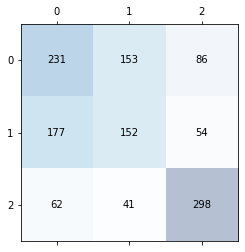

In [96]:
evaluator.show_confusion_matrix()